In [3]:
import mushdynamics as md

# Mush dynamics and compaction

## How to use the package



## Run one simulation

In [7]:
## The scripts here are also in the folder ./script/runs.py

def run(options):
    """ Run a model with the provided options"""
    print(options)
    model = md.growth.Compaction(md.mush.velocity_Sramek, **options)
    model.run()
    
def param_growth(r, exp, t_max, n=2, N_fig=5, basefolder="", R_init=1e-3, N_max=5000):
    dt = t_max/N_fig
    folder_name = basefolder+"/exp_{:.2e}_t_max_{:.2e}_radius_{:.2e}".format(exp, t_max, r)
    options = {'advection': "FLS",
                'n': n,
                'delta': 1.,
                'eta': 1.,
                'psi0': 1.,
                'psiN': 0.6,
                'phi_init': 0.4,
                'K0': 1.,
                'sign': 1.,
                'BC': "dVdz==0",
                'coordinates': "spherical",
                "growth_rate_exponent": exp,
                'filename': 'IC',
                'time_max': t_max,
                'dt_print': dt,
                'output': folder_name,
                "R_init": R_init*r,
                "N_init": max(5, int(N_max*R_init)),
                "Ric_adim": r}
    return options

options = param_growth(10., 1., 0.1, basefolder="./test/", R_init=5e-3, N_max=8000)
run(options)

{'advection': 'FLS', 'n': 2, 'delta': 1.0, 'eta': 1.0, 'psi0': 1.0, 'psiN': 0.6, 'phi_init': 0.4, 'K0': 1.0, 'sign': 1.0, 'BC': 'dVdz==0', 'coordinates': 'spherical', 'growth_rate_exponent': 1.0, 'filename': 'IC', 'time_max': 0.1, 'dt_print': 0.02, 'output': './test//exp_1.00e+00_t_max_1.00e-01_radius_1.00e+01', 'R_init': 0.05, 'N_init': 40, 'Ric_adim': 10.0}


output is then in the folder ./test/: 

In [11]:
from glob import glob
print(glob("./test/*"))
print(glob("./test/*/*"))

['./test/exp_1.00e+00_t_max_1.00e-01_radius_1.00e+01']
['./test/exp_1.00e+00_t_max_1.00e-01_radius_1.00e+01/output_0.06000000.timestep', './test/exp_1.00e+00_t_max_1.00e-01_radius_1.00e+01/output_0.10000000.timestep', './test/exp_1.00e+00_t_max_1.00e-01_radius_1.00e+01/output_0.09500000.timestep', './test/exp_1.00e+00_t_max_1.00e-01_radius_1.00e+01/IC_statistics.txt', './test/exp_1.00e+00_t_max_1.00e-01_radius_1.00e+01/output_0.04500000.timestep', './test/exp_1.00e+00_t_max_1.00e-01_radius_1.00e+01/output_0.07500000.timestep', './test/exp_1.00e+00_t_max_1.00e-01_radius_1.00e+01/output_0.08500000.timestep', './test/exp_1.00e+00_t_max_1.00e-01_radius_1.00e+01/output_0.00500000.timestep', './test/exp_1.00e+00_t_max_1.00e-01_radius_1.00e+01/output_0.01000000.timestep', './test/exp_1.00e+00_t_max_1.00e-01_radius_1.00e+01/output_0.03500000.timestep', './test/exp_1.00e+00_t_max_1.00e-01_radius_1.00e+01/output_0.07000000.timestep', './test/exp_1.00e+00_t_max_1.00e-01_radius_1.00e+01/IC_param.y

## Some examples of figures from the package



### Numerical scheme for the discretization of the equations

In [14]:
md.mush.schema()

 <-1 volume-> 
||-----.-----|-----.-----|       ...      .-----|-----.-----|-----.        ...       -----.-----|-----.-----||  
       0     0     1     1                                                                N-1  N-1    N          
 0   1/2dr  dr   3/2dr              |           |           |                       |           |                
             ->          ->               |     ->    |     ->    |                       |     ->    |            
 V0          V1          V2               |    V_i-1  |    V_i    |                       |    V_N-1  |     V_N   
      phi0        phi1                  phi_i-1     phi_i      phi_i+1                phi_N-1      phi_N         
            DP0         DP1                  DP_i-1                                           DP_N-1           



### Growth scenarios for the inner core

Dt supercooling 0.48899999999999993
1.0
0.5


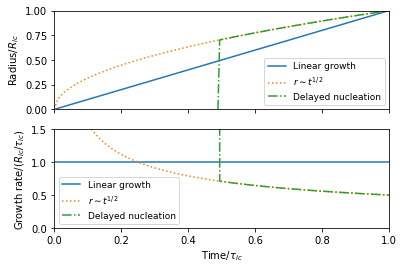

In [18]:
import warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore")  # for the sake of lisibility, we remove the warnings here
    md.growth.plot_growth([6, 4])